In [1]:
# calcul matriciel
import numpy as np
# utilisation des modèles
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score

2024-07-01 15:24:42.504549: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-01 15:24:42.504794: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-01 15:24:42.506907: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-01 15:24:42.535168: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-01 15:24:43.040595: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
class MNISTLoader:
  def __init__(self):
    self.x_train = None
    self.x_test = None
    self.x_val = None
    
    self.x_test_normalized = None
    self.x_train_normalized_80 = None
    self.x_val_normalized_20 = None
    self.y_test = None
    self.y_train_80 = None
    self.y_val_20 = None


  def load_data(self):
    (x_train, y_train), (self.x_test, self.y_test) = tf.keras.datasets.mnist.load_data()
    x_train_normalized = x_train / 255
    self.x_test_normalized = self.x_test / 255

    self.x_train, self.x_val, self.y_train_80, self.y_val_20 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    self.x_train_normalized_80, self.x_val_normalized_20, self.y_train_80, self.y_val_20 = train_test_split(x_train_normalized, y_train, test_size=0.2, random_state=42)


loader = MNISTLoader()
loader.load_data()


# Convolutional model with handly data

In [4]:
num_classes = 10
core_size = 3

model = Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(64, core_size, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, core_size, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, core_size, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Ajout d'une couche Dropout pour la régularisation
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Modification du taux d'apprentissage
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(loader.x_train_normalized_80,
          loader.y_train_80,
          validation_data=(loader.x_val_normalized_20, loader.y_val_20),
          epochs=10,  # Augmentation du nombre d'époques
          batch_size=64)  # Modification de la taille du batch

model.evaluate(loader.x_test_normalized, loader.y_test)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7865 - loss: 0.6606 - val_accuracy: 0.9779 - val_loss: 0.0783
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 45ms/step - accuracy: 0.9696 - loss: 0.1046 - val_accuracy: 0.9794 - val_loss: 0.0723
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9787 - loss: 0.0717 - val_accuracy: 0.9794 - val_loss: 0.0680
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9845 - loss: 0.0542 - val_accuracy: 0.9810 - val_loss: 0.0622
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.9880 - loss: 0.0412 - val_accuracy: 0.9832 - val_loss: 0.0620
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.9889 - loss: 0.0360 - val_accuracy: 0.9856 - val_loss: 0.0530
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9925 - loss: 0.0260 - val_accuracy: 0.9860 - val_loss: 0.0515
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9943 - loss: 0.0195 - 

[0.05311860516667366, 0.9876000285148621]

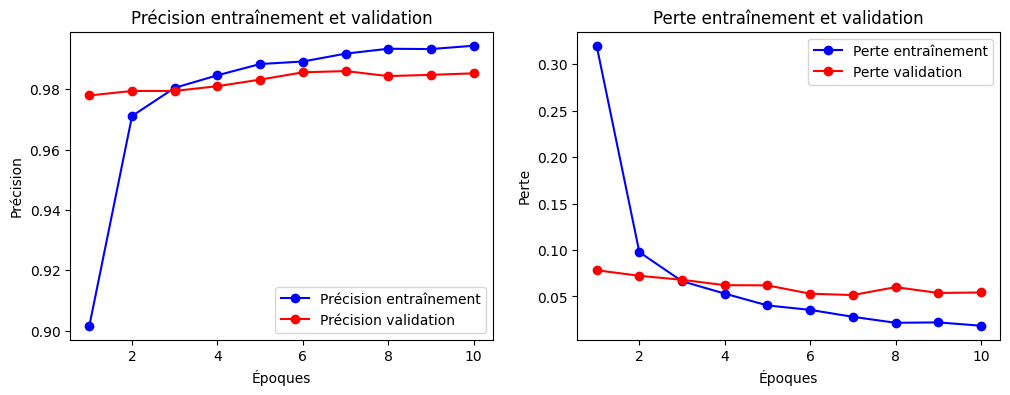

In [5]:
def plot_training_history(history):
    # Extraire les données de l'historique
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Tracer la courbe de précision
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Précision entraînement')
    plt.plot(epochs, val_acc, 'ro-', label='Précision validation')
    plt.title('Précision entraînement et validation')
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.legend()

    # Tracer la courbe de perte
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Perte entraînement')
    plt.plot(epochs, val_loss, 'ro-', label='Perte validation')
    plt.title('Perte entraînement et validation')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
import tkinter as tk
from PIL import Image, ImageDraw

# Création de la fenêtre principale
window = tk.Tk()

canvas = tk.Canvas(window, width=280, height=280, bg='white')
canvas.pack()

image = Image.new('L', (280, 280), 255)
draw = ImageDraw.Draw(image)

def clear_canvas():
    canvas.delete('all')
    global image, draw
    image = Image.new('L', (280, 280), 255)
    draw = ImageDraw.Draw(image)

clear_button = tk.Button(window, text='Clear', command=clear_canvas)
clear_button.pack()


# Fonction appelée lors du dessin
def draw_on_canvas(event):
    x, y = event.x, event.y
    canvas.create_oval(x, y, x+10, y+10, fill='black')
    draw.rectangle([x, y, x+10, y+10], fill='black')

# Fonction appelée lors de la prédiction
def predict_digit():
    # Redimensionner l'image à la taille attendue par le modèle (28x28)
    resized_image = image.resize((28, 28))

    # Prétraitement de l'image pour l'adapter au modèle (conversion en tableau numpy, normalisation, etc.)
    preprocessed_image = preprocess_image(resized_image)

    # Effectuer la prédiction avec le modèle
    predictions = model.predict(np.expand_dims([preprocessed_image], axis=-1))[0]
    prediction = np.argmax(predictions)

    # Afficher la prédiction
    prediction_label.config(text='Prediction: ' + str(prediction))

# Fonction pour prétraiter l'image avant la prédiction
def preprocess_image(image):
    # Convertir l'image en niveaux de gris
    image = image.convert('L')

    # Convertir l'image en tableau numpy
    image_array = np.array(image)

    # Inverser le noir et le blanc
    image_array = 255 - image_array

    # Trouver les limites du dessin (les coordonnées où il y a du noir)
    nonzero_indices = np.nonzero(image_array)
    min_x = np.min(nonzero_indices[1])
    max_x = np.max(nonzero_indices[1])
    min_y = np.min(nonzero_indices[0])
    max_y = np.max(nonzero_indices[0])

    # Extraire la zone contenant le dessin et la centrer dans une image 28x28
    cropped_image = image_array[min_y:max_y, min_x:max_x]

    # Redimensionner l'image à 28x28
    resized_image = Image.fromarray(cropped_image).resize((28, 28))

    # Normaliser l'image comme dans votre chargement de données
    preprocessed_image = np.array(resized_image) / 255.0

    # Ajouter une dimension pour correspondre à la forme attendue par le modèle
    preprocessed_image = np.expand_dims(preprocessed_image, axis=-1)

    return preprocessed_image

predict_button = tk.Button(window, text='Predict', command=predict_digit)
predict_button.pack()

prediction_label = tk.Label(window, text='Prediction: ')
prediction_label.pack()

# Capturer les événements de dessin sur la toile
canvas.bind('<B1-Motion>', draw_on_canvas)

# Lancer l'application
window.mainloop()